**Скачивание пользователей**

In [1]:
import pandas as pd
import numpy as np

url = "postgresql://robot-startml-ro:pheiph0hahj1Vaif@""postgres.lab.karpov.courses:6432/startml" #подключение

user_table_request = """SELECT * FROM user_data;"""                # SQL запрос для получения таблицы пользователей 
post_text_table_request = """SELECT * FROM public.post_text_df;""" # SQL запрос для получения таблицы постов

users = pd.read_sql(user_table_request, con=url)      # скачивание таблицы пользователей
posts = pd.read_sql(post_text_table_request, con=url) # скачивание таблицы постов


In [2]:
feed_request = """SELECT * FROM public.feed_data ORDER BY random() LIMIT 10000000""" # SQL запрос для получения таблицы фида

feed = pd.read_sql(feed_request,con=url) # скачивание таблицы фида

In [3]:
PATH = "C:\\Users\\Daniil\\Desktop\\Курсы\\courses\\final project\\22 task Рекомендательные системы\\data" # локальное сохранение таблиц

users.to_csv(PATH + "\\users.csv")
posts.to_csv(PATH + "\\posts.csv")
feed.to_csv(PATH + "\\feed.csv")

In [4]:
users

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [5]:
feed

,timestamp,user_id,post_id,action,target
0,2021-11-07 06:58:46,14522,1838,view,0
1,2021-10-06 11:01:20,5461,882,view,0
2,2021-11-21 15:32:42,143541,5320,view,0
3,2021-12-19 22:43:00,66291,4281,like,0
4,2021-12-04 18:22:14,53220,1090,view,0
...,...,...,...,...,...
9999995,2021-10-29 20:56:05,50129,6656,view,0
9999996,2021-11-10 19:58:00,138046,4021,like,0
9999997,2021-12-05 09:25:37,69708,5205,view,1
9999998,2021-12-09 12:47:22,135151,3801,view,0


In [6]:
feed["user_id"].nunique()

163205

**Обработка полученных таблиц**

*Feed*

In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = "C:\\Users\\Daniil\\Desktop\\Курсы\\courses\\final project\\22 task Рекомендательные системы\\data" # локальный путь к файлам

In [3]:
feed = pd.read_csv(PATH + "\\feed.csv").drop("Unnamed: 0", axis=1) # чтение таблицы фида 

In [4]:
feed = feed[feed["action"]!="like"] # очистка случаев от уже пролайканных постов

In [5]:
feed.head()

,timestamp,user_id,post_id,action,target
0,2021-11-07 06:58:46,14522,1838,view,0
1,2021-10-06 11:01:20,5461,882,view,0
2,2021-11-21 15:32:42,143541,5320,view,0
4,2021-12-04 18:22:14,53220,1090,view,0
5,2021-11-15 11:20:53,42665,5762,view,0


In [6]:
feed["timestamp"] = pd.to_datetime(feed["timestamp"]) # преобразование колонки timestamp в тип datetime
feed

,timestamp,user_id,post_id,action,target
0,2021-11-07 06:58:46,14522,1838,view,0
1,2021-10-06 11:01:20,5461,882,view,0
2,2021-11-21 15:32:42,143541,5320,view,0
4,2021-12-04 18:22:14,53220,1090,view,0
5,2021-11-15 11:20:53,42665,5762,view,0
...,...,...,...,...,...
9999994,2021-11-07 20:01:36,142228,5250,view,1
9999995,2021-10-29 20:56:05,50129,6656,view,0
9999997,2021-12-05 09:25:37,69708,5205,view,1
9999998,2021-12-09 12:47:22,135151,3801,view,0


In [7]:
feed.dtypes

timestamp    datetime64[ns]
user_id               int64
post_id               int64
action               object
target                int64
dtype: object

In [8]:
feed["day_of_week"] = feed["timestamp"].dt.dayofweek # создание колонки с днем недели

In [9]:
feed["day_hour"] = feed["timestamp"].dt.hour # создание колонки часа

In [10]:
feed["month"] = feed["timestamp"].dt.month # создание колонки месяца

In [11]:
feed["timestamp"].dt.month

0          11
1          10
2          11
4          12
5          11
           ..
9999994    11
9999995    10
9999997    12
9999998    12
9999999    10
Name: timestamp, Length: 8932381, dtype: int64

In [12]:
feed.head()

,timestamp,user_id,post_id,action,target,day_of_week,day_hour,month
0,2021-11-07 06:58:46,14522,1838,view,0,6,6,11
1,2021-10-06 11:01:20,5461,882,view,0,2,11,10
2,2021-11-21 15:32:42,143541,5320,view,0,6,15,11
4,2021-12-04 18:22:14,53220,1090,view,0,5,18,12
5,2021-11-15 11:20:53,42665,5762,view,0,0,11,11


In [13]:
feed["target"].value_counts() # проверка баланса классов

0    7866637
1    1065744
Name: target, dtype: int64

In [14]:
feed = feed.drop("action", axis=1) # удаление колонки action  т.к. там находиться только "view"

In [15]:
feed.shape

(8932381, 7)

*Users*

In [16]:
users = pd.read_csv(PATH + "\\users.csv").drop("Unnamed: 0", axis=1) # загрузка таблицы пользователей

In [17]:
users.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [18]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

users["country"] = lab_enc.fit_transform(users["country"].to_numpy()) # Енкодинг колонки country
users["city"] = lab_enc.fit_transform(users["city"].to_numpy())       # Енкодинг колонки city
users.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,7,651,3,Android,ads
1,201,0,37,7,2,0,Android,ads
2,202,1,17,7,2931,4,Android,ads
3,203,0,18,7,1953,1,iOS,ads
4,204,0,36,7,125,3,Android,ads


In [19]:
users.shape # размеры таблицы пользователей

(163205, 8)

In [20]:
user_columns = users.columns # сохранение порядка колонок таблицы

In [21]:
user_columns

Index(['user_id', 'gender', 'age', 'country', 'city', 'exp_group', 'os',
       'source'],
      dtype='object')

*Posts*

In [22]:
posts = pd.read_csv(PATH + "\\posts.csv").drop("Unnamed: 0", axis=1) # загрузка таблицы постов

In [23]:
posts.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


Создание эмбеддингов в ноутбуке text_embbedings

In [26]:
embeddings = pd.read_csv(PATH + "\\embeddings_from_bert.csv").drop("Unnamed: 0", axis=1) # загрузка эмбеддингов текстов
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,101,26006,4190,4749,1558,11040,1103,26006,5863,4291,...,0,0,0,0,0,0,0,0,0,0
1,101,23078,1105,4530,1499,5358,22287,12932,4530,1849,...,1107,1995,1671,3478,1127,1304,9588,1115,1147,102
2,101,1112,1811,186,6718,2391,4919,27772,3186,1389,...,1703,4190,6928,11478,4474,19602,2434,1744,1164,102
3,101,1107,7168,1540,6117,5152,1113,1963,6117,1107,...,0,0,0,0,0,0,0,0,0,0
4,101,2495,1665,21418,1775,3107,3306,1118,1366,3016,...,0,0,0,0,0,0,0,0,0,0


**Понижение размерности эмбеддингов**

In [27]:
from sklearn.decomposition import TruncatedSVD

num_comp = 10 

svd = TruncatedSVD(n_components=num_comp, random_state=42)
emb_svd = svd.fit_transform(embeddings) # получение эмбеддингов пониженной размерности

for i in range(num_comp):          # запись полученных эмбеддингов в общую таблицу постов
    new_col = 'emb_' + str(i)
    posts[new_col] = emb_svd[:,i]

posts.head()

,post_id,text,topic,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,1,UK economy facing major risks\n\nThe UK manufa...,business,70806.852453,2839.420824,-3555.156861,-22716.351758,6221.822080,-7017.458420,-10804.555999,1466.668684,8785.195984,-4484.919417
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,87608.056072,-31497.320626,13655.518700,8868.536110,9958.537453,-385.631417,-2567.665651,12074.797611,3186.668768,11115.739291
2,3,Asian quake hits European shares\n\nShares in ...,business,110497.798224,-31085.020863,13283.037330,2002.511644,-16522.043120,-5018.594708,-333.543297,2218.284407,-25984.034503,-12843.293317
3,4,India power shares jump on debut\n\nShares in ...,business,50583.123155,25355.685305,-14471.978485,8761.735158,-10464.168918,-350.467755,-161.285380,-9552.972636,2260.579388,-12.219827
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,51473.704770,31142.221793,-7773.449700,14921.649727,-1906.427632,-3718.798599,8428.858045,-8474.822908,7243.253844,-7871.755695


In [25]:
posts = pd.get_dummies(posts,columns=["topic"], drop_first=True) # OHE колонки topic
posts.head()

,post_id,text,topic_covid,topic_entertainment,topic_movie,topic_politics,topic_sport,topic_tech
0,1,UK economy facing major risks\n\nThe UK manufa...,0,0,0,0,0,0
1,2,Aids and climate top Davos agenda\n\nClimate c...,0,0,0,0,0,0
2,3,Asian quake hits European shares\n\nShares in ...,0,0,0,0,0,0
3,4,India power shares jump on debut\n\nShares in ...,0,0,0,0,0,0
4,5,Lacroix label bought by US firm\n\nLuxury good...,0,0,0,0,0,0


In [26]:
# удаление колонки text

posts_cols = posts.columns

for i in posts_cols: 
    if i == "text":
        posts = posts.drop("text", axis=1)

posts.shape

(7023, 7)

In [27]:
posts.head()

,post_id,topic_covid,topic_entertainment,topic_movie,topic_politics,topic_sport,topic_tech
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0


**Отправление фичей постов**

In [57]:
import pandas as pd
from sqlalchemy import create_engine


engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)

# .to_sql('daniil_gorenkov_features_lesson_22', con=engine, if_exists="replace")

posts.to_sql("daniil_gorenkov_prep_posts_lesson_22", con=engine, if_exists="replace")

23

**Объединение фреймов**

In [28]:
# объедениение таблиц пользователя, постов и фида в одну

user_feed = feed.merge(users,on="user_id") 
df = user_feed.merge(posts, on="post_id")  

df.head()

,timestamp,user_id,post_id,target,day_of_week,day_hour,month,gender,age,country,city,exp_group,os,source,topic_covid,topic_entertainment,topic_movie,topic_politics,topic_sport,topic_tech
0,2021-11-07 06:58:46,14522,1838,0,6,6,11,1,31,7,571,1,iOS,ads,0,0,0,0,1,0
1,2021-10-30 08:31:59,70492,1838,0,5,8,10,0,28,7,1059,1,Android,ads,0,0,0,0,1,0
2,2021-10-24 07:17:08,122324,1838,0,6,7,10,1,21,7,3552,4,Android,organic,0,0,0,0,1,0
3,2021-11-24 21:02:00,8105,1838,0,2,21,11,0,26,7,673,2,Android,ads,0,0,0,0,1,0
4,2021-10-20 17:04:10,148668,1838,0,2,17,10,0,24,7,3103,1,Android,organic,0,0,0,0,1,0


In [29]:
# применение таргет энкодера к колонкам "age", "country", "city"

from category_encoders import TargetEncoder

cols_for_mte = ["age", "country", "city"]

for col in cols_for_mte:                                
    
    te = TargetEncoder(cols=[col])
    transform = te.fit_transform(df[col],df["target"])
    df[col] = transform.to_numpy()

df.head()

c:\Users\Daniil\AppData\Local\Programs\Python\Python38\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\Users\Daniil\AppData\Local\Programs\Python\Python38\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
c:\Users\Daniil\AppData\Local\Programs\Python\Python38\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change

,timestamp,user_id,post_id,target,day_of_week,day_hour,month,gender,age,country,city,exp_group,os,source,topic_covid,topic_entertainment,topic_movie,topic_politics,topic_sport,topic_tech
0,2021-11-07 06:58:46,14522,1838,0,6,6,11,1,0.120030,0.112527,0.117813,1,iOS,ads,0,0,0,0,1,0
1,2021-10-30 08:31:59,70492,1838,0,5,8,10,0,0.120087,0.112527,0.118929,1,Android,ads,0,0,0,0,1,0
2,2021-10-24 07:17:08,122324,1838,0,6,7,10,1,0.118787,0.112527,0.134553,4,Android,organic,0,0,0,0,1,0
3,2021-11-24 21:02:00,8105,1838,0,2,21,11,0,0.118780,0.112527,0.137658,2,Android,ads,0,0,0,0,1,0
4,2021-10-20 17:04:10,148668,1838,0,2,17,10,0,0.118411,0.112527,0.137324,1,Android,organic,0,0,0,0,1,0


In [30]:
df.columns

Index(['timestamp', 'user_id', 'post_id', 'target', 'day_of_week', 'day_hour',
       'month', 'gender', 'age', 'country', 'city', 'exp_group', 'os',
       'source', 'topic_covid', 'topic_entertainment', 'topic_movie',
       'topic_politics', 'topic_sport', 'topic_tech'],
      dtype='object')

**Отправление фичей пользователей**

In [61]:
users_ = df[user_columns]
users_.head()

,user_id,gender,age,country,city,exp_group,os,source
0,14522,1,0.120030,0.112527,0.117813,1,iOS,ads
1,70492,0,0.120087,0.112527,0.118929,1,Android,ads
2,122324,1,0.118787,0.112527,0.134553,4,Android,organic
3,8105,0,0.118780,0.112527,0.137658,2,Android,ads
4,148668,0,0.118411,0.112527,0.137324,1,Android,organic


In [62]:
cutted_users = users_.drop_duplicates("user_id") # удаление дубликатов пользователей
cutted_users.shape

(163205, 8)

In [63]:
cutted_users.head()

,user_id,gender,age,country,city,exp_group,os,source
0,14522,1,0.120030,0.112527,0.117813,1,iOS,ads
1,70492,0,0.120087,0.112527,0.118929,1,Android,ads
2,122324,1,0.118787,0.112527,0.134553,4,Android,organic
3,8105,0,0.118780,0.112527,0.137658,2,Android,ads
4,148668,0,0.118411,0.112527,0.137324,1,Android,organic


In [64]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)
            #  to_sql("daniil_gorenkov_prep_posts_lesson_22", con=engine, if_exists="replace")
cutted_users.to_sql("daniil_gorenkov_prep_users_lesson_22", con=engine, if_exists="replace")

205

**Продолжение работы с фреймом**

In [31]:
df = df.drop(["user_id", "post_id"], axis=1) # удаление фичей "user_id", "post_id"
df.head()

,timestamp,target,day_of_week,day_hour,month,gender,age,country,city,exp_group,os,source,topic_covid,topic_entertainment,topic_movie,topic_politics,topic_sport,topic_tech
0,2021-11-07 06:58:46,0,6,6,11,1,0.120030,0.112527,0.117813,1,iOS,ads,0,0,0,0,1,0
1,2021-10-30 08:31:59,0,5,8,10,0,0.120087,0.112527,0.118929,1,Android,ads,0,0,0,0,1,0
2,2021-10-24 07:17:08,0,6,7,10,1,0.118787,0.112527,0.134553,4,Android,organic,0,0,0,0,1,0
3,2021-11-24 21:02:00,0,2,21,11,0,0.118780,0.112527,0.137658,2,Android,ads,0,0,0,0,1,0
4,2021-10-20 17:04:10,0,2,17,10,0,0.118411,0.112527,0.137324,1,Android,organic,0,0,0,0,1,0


In [32]:
df["timestamp"].max(), df["timestamp"].min() # верхний и нижний пороги времени

(Timestamp('2021-12-29 23:51:06'), Timestamp('2021-10-01 06:01:40'))

In [33]:
train = df[df["timestamp"] <= pd.Timestamp("2021-12-25 00:00:00")] # обучающая выборка 

In [34]:
test = df[df["timestamp"] > pd.Timestamp("2021-12-25 00:00:00")] # тестовая выборка

In [35]:
test.shape # размеры тестовой выборки

(500455, 18)

In [36]:
X_train = train.drop(["target", "timestamp"], axis=1) # удаление колонок "target", "timestamp" из обучающей выборки
X_test = test.drop(["target", "timestamp"], axis=1)   # удаление колонок "target", "timestamp" из обучающей выборки

y_train = train["target"] # тренировочный таргет 
y_test = test["target"]   # тестовый таргет

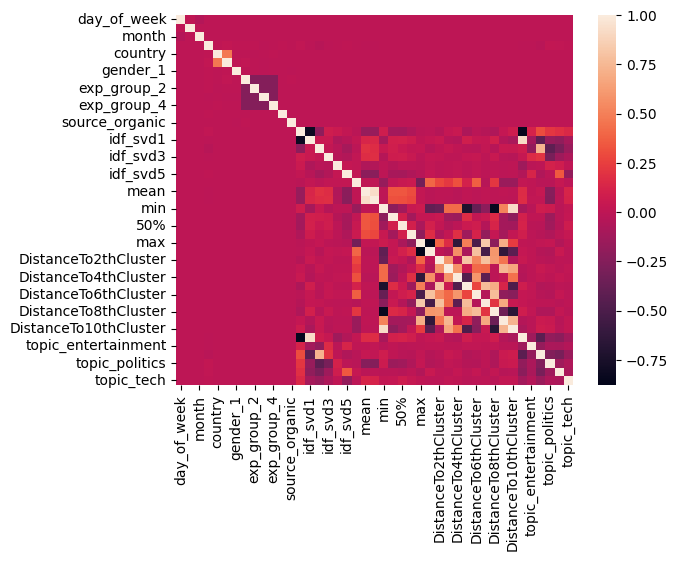

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X_train.corr()) # матрица корреляций фичей
plt.show()

**Обучение модельки**

In [39]:
def plot_auc_roc(estimator, X_train:pd.DataFrame,
                  X_test:pd.DataFrame, y_train:pd.DataFrame,
                  y_test:pd.DataFrame) -> np.array:
    
    from sklearn.metrics import roc_curve
    from sklearn.metrics import RocCurveDisplay
    from sklearn.metrics import auc 
    from sklearn.metrics import classification_report
    import matplotlib.pyplot as plt

    fpr, tpr, _ = roc_curve(y_train, estimator.predict_proba(X_train)[:, 1])

    # рисую тренировочную ROC-кривую

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()
    plt.title("AUC_ROC Train curve")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, estimator.predict_proba(X_test)[:, 1])

    # рисую тестовую ROC-кривую

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()
    plt.title("AUC_ROC Test curve")
    plt.show()

    # Результаты работы модели

    print(classification_report(y_train,estimator.predict(X_train)))
    print("--------------------------")
    print(classification_report(y_test,estimator.predict(X_test)))
    print("--------------------------")
    print(f"auc  на тесте : {auc(fpr, tpr).round(4)}")


In [40]:
X_train.head()

,day_of_week,day_hour,month,gender,age,country,city,exp_group,os,source,topic_covid,topic_entertainment,topic_movie,topic_politics,topic_sport,topic_tech
0,6,6,11,1,0.120030,0.112527,0.117813,1,iOS,ads,0,0,0,0,1,0
1,5,8,10,0,0.120087,0.112527,0.118929,1,Android,ads,0,0,0,0,1,0
2,6,7,10,1,0.118787,0.112527,0.134553,4,Android,organic,0,0,0,0,1,0
3,2,21,11,0,0.118780,0.112527,0.137658,2,Android,ads,0,0,0,0,1,0
4,2,17,10,0,0.118411,0.112527,0.137324,1,Android,organic,0,0,0,0,1,0


In [42]:
object_cols = ["os","gender","source","exp_group"] # категориальные колонки

In [47]:
%pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
accelerate                   0.22.0
anyio                        3.7.1
asgiref                      3.7.2
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
catalyst                     22.4
catboost                     1.2
category-encoders            2.5.0
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           2.0.12
click                        8.1.6
colorama                     0.3.9
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
exceptiongroup               1.1.2
executing                    1.2.0
fastapi                      0.75.1
filelock                     3.12.3
flatbuffers                  23.5.26
fontt

You should consider upgrading via the 'c:\Users\Daniil\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [43]:
from catboost import CatBoostClassifier # импорт классификатора катбуста

catboost = CatBoostClassifier(100,0.8,5) # используем модель катбуста 

catboost.fit(X_train, y_train,cat_features=object_cols) # обучение модельки с указанием категориальных фичей

0:	learn: 0.3983777	total: 1.28s	remaining: 2m 7s
1:	learn: 0.3593391	total: 2.16s	remaining: 1m 45s
2:	learn: 0.3527453	total: 2.76s	remaining: 1m 29s
3:	learn: 0.3490848	total: 3.51s	remaining: 1m 24s
4:	learn: 0.3485473	total: 4.06s	remaining: 1m 17s
5:	learn: 0.3483104	total: 4.62s	remaining: 1m 12s
6:	learn: 0.3471257	total: 5.2s	remaining: 1m 9s
7:	learn: 0.3470330	total: 5.74s	remaining: 1m 6s
8:	learn: 0.3465801	total: 6.29s	remaining: 1m 3s
9:	learn: 0.3465349	total: 6.84s	remaining: 1m 1s
10:	learn: 0.3459654	total: 7.43s	remaining: 1m
11:	learn: 0.3457954	total: 8.01s	remaining: 58.7s
12:	learn: 0.3457836	total: 8.55s	remaining: 57.2s
13:	learn: 0.3457718	total: 9.1s	remaining: 55.9s
14:	learn: 0.3457466	total: 9.65s	remaining: 54.7s
15:	learn: 0.3455968	total: 10.2s	remaining: 53.5s
16:	learn: 0.3455907	total: 10.7s	remaining: 52.3s
17:	learn: 0.3451836	total: 11.3s	remaining: 51.3s
18:	learn: 0.3451183	total: 11.8s	remaining: 50.4s
19:	learn: 0.3451139	total: 12.4s	remaini

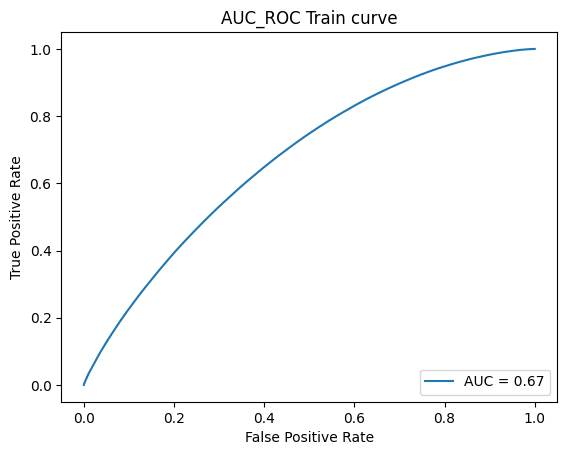

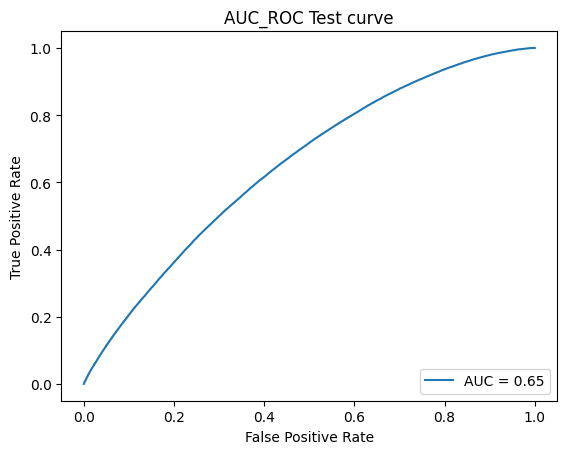

              precision    recall  f1-score   support

           0       0.88      1.00      0.94   7434517
           1       0.44      0.00      0.00    997409

    accuracy                           0.88   8431926
   macro avg       0.66      0.50      0.47   8431926
weighted avg       0.83      0.88      0.83   8431926

--------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.93    432120
           1       0.25      0.00      0.00     68335

    accuracy                           0.86    500455
   macro avg       0.56      0.50      0.46    500455
weighted avg       0.78      0.86      0.80    500455

--------------------------
auc  на тесте : 0.652


In [44]:
plot_auc_roc(catboost, X_train, X_test, y_train, y_test)

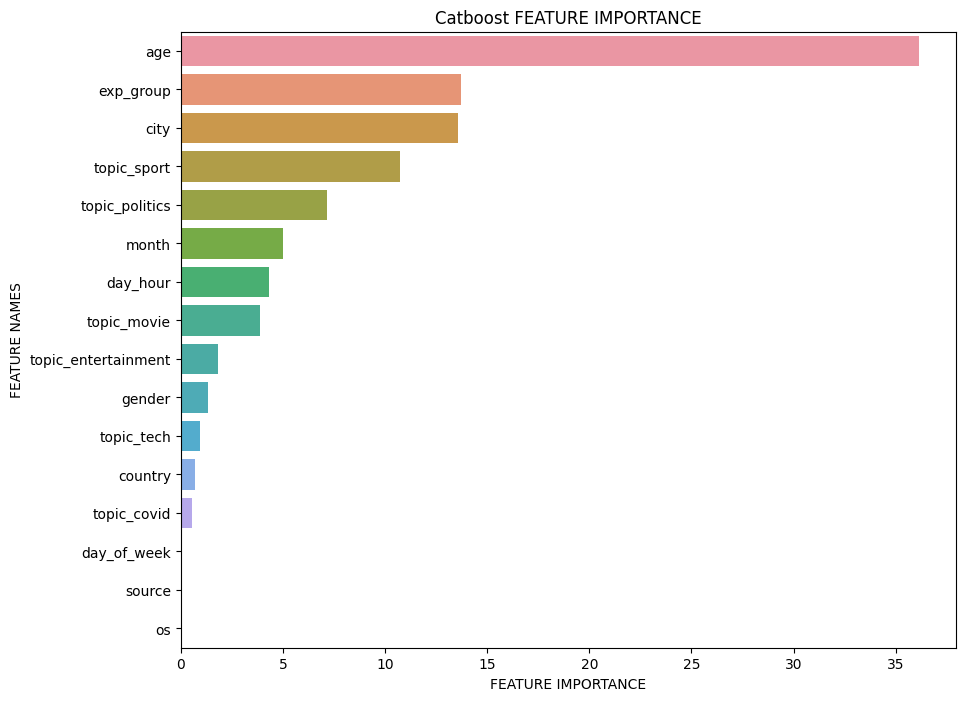

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost.feature_importances_,X_train.columns,'Catboost')

In [46]:
catboost.save_model("catboost_65_control",format="cbm") # сохранение полученной модельки 

In [65]:
cbm = CatBoostClassifier().load_model("catboost_67") # чтение сохраненной модельки